In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import numpy as np
from tslearn.metrics import dtw, cdist_dtw
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, average, complete
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.covariance import LedoitWolf

# Cluster the first half of the dataset!

# 1. Loading in the Data and Basic Analysis

## 1.1 Data Preprocessing

Load in the ETF return data and index return data

In [2]:
ETF_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetNEWERdates.csv", index_col=0)

In [3]:
Index_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-index_data.csv",index_col=0)

In [4]:
ETF_data.head()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.000092,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.016010,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,0.003689,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.059568,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.052510,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111


In [5]:
Index_data.head(5)

,AsiaSMALL LoBO,AsiaME1 BO2,AsiaME1 BO3,AsiaME1 BO4,AsiaSMALL HiBO,AsiaME2 BO1,AsiaME2 BO2,AsiaME2 BO3,AsiaME2 BO4,AsiaME2 BO5,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
,,,,,,,,,,,,,,,,,,,,,
2000-11-15,-0.016350,0.004071,-0.019912,-0.014557,-0.017356,-0.012267,-0.024224,-0.016517,-0.015568,-0.012546,...,0.015049,0.013815,-0.042876,-0.034672,0.003267,0.001545,0.002784,0.003694,0.004148,0.005609
2000-11-22,0.006672,0.016849,0.016397,0.006049,0.003423,-0.006967,0.007591,0.006678,0.008349,0.002632,...,-0.037312,0.011465,-0.089051,-0.058248,0.003461,0.000998,0.001474,0.002552,0.004613,0.010358
2000-11-29,-0.029141,-0.024495,-0.017090,-0.031009,-0.024471,-0.051371,-0.020776,-0.005210,-0.022288,-0.026797,...,0.019825,-0.001677,-0.004267,0.006627,0.006869,0.003444,0.006166,0.007838,0.009037,0.010558
2000-12-06,-0.012367,-0.015601,-0.023586,-0.005379,-0.010344,-0.021430,-0.022750,-0.013214,0.021566,-0.011720,...,0.008048,-0.050099,0.001868,0.027445,0.002910,0.003071,0.004431,0.004902,0.004051,-0.002972
2000-12-13,0.000938,0.015727,0.020245,-0.002130,0.013378,0.011243,0.026620,0.014591,0.020863,0.014379,...,0.010919,0.033585,0.067698,0.006119,0.006227,0.002431,0.004328,0.006113,0.007530,0.014818


The indexes are objects and we need to change them to daytime

In [6]:
ETF_data.index = pd.to_datetime(ETF_data.index, yearfirst=True)

In [7]:
Index_data.index = pd.to_datetime(Index_data.index, yearfirst=True)

Now we can join the two dataframes on the index of the ETF dataframe.

In [8]:
joined = ETF_data.join(Index_data)

In [9]:
joined

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.007661,-0.008260,0.001517,0.005168,0.003626,-0.000056,0.000381,0.001109,0.003562,0.010203
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.020985,-0.021133,-0.016002,-0.012500,0.002894,-0.000056,0.000489,0.001491,0.003176,0.007490
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.000254,-0.004398,0.001961,0.005572,0.001167,-0.000336,0.000077,0.000938,0.002085,0.002663
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.052006,-0.056164,-0.062589,-0.042066,-0.004158,-0.001175,-0.003055,-0.004442,-0.004556,-0.006895
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.063258,0.076020,0.035589,0.041156,-0.001280,-0.000168,-0.000117,-0.000121,-0.000945,-0.003821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
joined.index.dtype

dtype('<M8[ns]')

We only have the index data until the 2019-04-10 so we need to cut the end of the dataframe.

In [11]:
enddate = "04-11-2019" 

joined = joined[joined.index < enddate]

joined.tail()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
2019-03-13,-0.000617,0.006665,0.003033,0.005002,0.006041,-0.032574,0.004032,0.031632,-0.001123,0.004032,...,0.018714,-0.002824,-0.001776,0.022301,-0.000839,-0.000167,-0.000460,-0.000675,-0.000740,-0.001616
2019-03-20,-0.001074,-0.000407,0.000162,0.000214,-0.001426,0.022585,-0.003883,-0.012407,-0.007473,-0.001096,...,-0.016113,-0.024386,-0.011934,-0.006389,0.008319,0.000222,0.001439,0.003326,0.007220,0.020606
2019-03-27,0.014981,0.008535,0.016752,0.014981,0.012026,-0.020018,0.031247,-0.020677,0.015535,0.024239,...,-0.000718,0.004927,-0.008209,0.003505,0.000740,0.000222,0.000839,0.001018,0.000942,0.000760
2019-04-03,0.007966,0.019795,0.004954,0.008053,0.013855,0.083112,-0.010384,0.045146,0.001184,-0.005459,...,0.018245,0.040046,0.052647,0.019539,-0.002148,-0.000666,-0.001088,-0.001379,-0.002429,-0.003900
2019-04-10,0.004224,0.000103,0.000641,0.000528,0.000815,0.008223,0.002888,0.002351,-0.002967,0.001022,...,0.004748,0.001318,0.003198,-0.011486,-0.000404,0.000333,0.000638,0.000984,0.000106,-0.002371


In [12]:
percentage = int(len(joined) * 0.5)
joined = joined[:percentage]

# 2. Clustering <a class="anchor" id="three"></a>

When clustering the indexes the analysis can be divided into three different parts:
- Determining a measure to quantify the similarities between observations
- Determining which clustering method to use
- Finding the optimal number of clusters

In this chapter the main refrence is a thesis written by Pjotr Roelofsen in 2018, on [Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).


## 2.1 Distance Measures <a class="anchor" id="three.one"></a>

Many different distance measures can be considered when clustering time series data. In this analysis three different methods will be considered:

- The Euclidean Distance (A Lock-Step Measure)
- The Person Correlation Distance (A Lock-Step Measure)
- The Dynamic Time Wraping (Elastic measure)

These methods were chosen since they seem to be the most popular ones and are straight forward in application. When comparing these three distance measures the calculation time for the DTW measure is much higher than for the Correlation measure, but it is more robust and often outperforms the other.


### 2.1.2 Spearman!!! Correlation Distance<a class="anchor" id="three.one.one"></a>

In the Pearson Correlation Distance the linear association between two time series is calculated. For further information on how the correlation is defined, see [chapter 2.1.2](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). The correlation lies in the range [-1,1] and the distance is defined as
$d_{cor}(x,y)=1-\rho(x,y)$. So if the correlation is high, the distance is small and if it is low the distance is high. 

This distance measure is considered a lock-step method since it compares the same timepoint between both series.

In [13]:
corr = joined.corr(method="spearman") #calculate the correlation
distance_corr = 1-corr #distance based on correlation

In [14]:
distance_corr

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
ANGL,0.000000,0.229647,0.156936,0.164791,0.194459,0.725623,0.491682,0.516899,0.235892,0.346916,...,0.300271,0.342465,0.317170,0.266835,0.908047,0.915565,0.912854,0.907257,0.927033,0.906310
AOA,0.229647,0.000000,0.120724,0.064692,0.021834,0.518779,0.634724,0.296503,0.329526,0.485365,...,0.128571,0.149751,0.138627,0.100157,0.866422,0.770466,0.803433,0.820111,0.865368,0.884005
AOK,0.156936,0.120724,0.000000,0.021806,0.062719,0.561893,0.316778,0.331612,0.105541,0.179761,...,0.194894,0.278814,0.285080,0.176399,0.788919,0.747370,0.771806,0.777026,0.794509,0.801033
AOM,0.164791,0.064692,0.021806,0.000000,0.022632,0.524712,0.394837,0.296133,0.155669,0.256445,...,0.156787,0.224954,0.223280,0.135729,0.802201,0.752277,0.773337,0.776335,0.802927,0.816315
AOR,0.194459,0.021834,0.062719,0.022632,0.000000,0.498419,0.521080,0.281505,0.245912,0.373558,...,0.135892,0.184269,0.173601,0.113317,0.830815,0.753865,0.780765,0.791867,0.827881,0.845891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LET1TREU Index,0.915565,0.770466,0.747370,0.752277,0.753865,0.907047,0.806844,0.861090,0.803960,0.762967,...,0.820845,0.791611,0.898366,0.769419,0.362725,0.000000,0.074187,0.196909,0.298095,0.456212
LET3TREU Index,0.912854,0.803433,0.771806,0.773337,0.780765,0.923957,0.800107,0.862370,0.834774,0.764834,...,0.871008,0.825694,0.951018,0.809237,0.214243,0.074187,0.000000,0.052728,0.138926,0.306865
LET5TREU Index,0.907257,0.820111,0.777026,0.776335,0.791867,0.902713,0.777233,0.860362,0.845877,0.753226,...,0.878230,0.845528,0.976905,0.837993,0.094915,0.196909,0.052728,0.000000,0.037074,0.169570
LET7TREU Index,0.927033,0.865368,0.794509,0.802927,0.827881,0.905291,0.739211,0.869470,0.861658,0.742188,...,0.902001,0.891454,1.019456,0.889460,0.033165,0.298095,0.138926,0.037074,0.000000,0.078899


In [15]:
corr.iloc[539:,:539].mean().mean()

0.5789974164709034

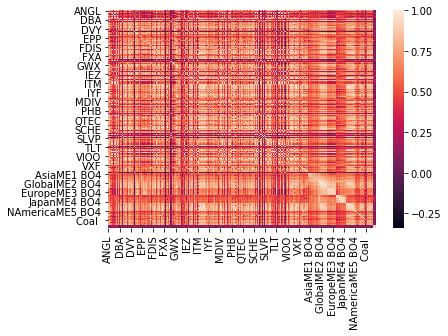

In [16]:
import seaborn as sns
%matplotlib inline

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=30 ,#corr.columns,
        yticklabels=30 #corr.columns,
           )

### 2.1.3 Dynamic Time Wrapping<a class="anchor" id="three.one.two"></a> 

The difference between elastic distance measures and lock-step distance measures is that the elastic measures allow for one-to-many or one-to-none point matching. This gives more flexibility and robustness for example in handling outliers.

DTW is a relatively new method, introduced in 2004, which seeks to overcome some of the disadvantages of the Euclidean distance. In general, DTW calculates an optimal match between two given sequences, ot the path that has the minimal cost (while fulfilling all the restrictions). For further details on oth the algorithm works see [Wikipedia article](https://en.wikipedia.org/wiki/Dynamic_time_warping) or [Pjotr Roelofsens thesis on Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).

Here the dtw function in tslearn is used to calculate the dtw value, for docmumentation see [here](https://tslearn.readthedocs.io/en/latest/gen_modules/metrics/tslearn.metrics.dtw.html).

Lets try the function and see how it works.

So it delivers a single similarity measure when two time-series are compared. Now we calculate the dtw matrix comparing all pairs of the time series.

In [17]:
joined_np=np.transpose(joined.values) #change the dataframe into a numpy array

distance_dtw =cdist_dtw(joined_np) #calculate the dtw matrix

distance_dtw=pd.DataFrame(data = distance_dtw, index=joined.columns, columns=joined.columns) #save it into a dataframe

In [18]:
distance_dtw

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
ANGL,0.000000,0.125414,0.092921,0.095049,0.107958,0.466332,0.121756,0.317061,0.107421,0.114223,...,0.161256,0.236916,0.221452,0.159209,0.156280,0.198079,0.185282,0.172769,0.156355,0.135483
AOA,0.125414,0.000000,0.100964,0.082973,0.044848,0.437862,0.155732,0.280648,0.142954,0.157765,...,0.112441,0.186310,0.166266,0.099866,0.183694,0.226647,0.213552,0.199059,0.182372,0.156412
AOK,0.092921,0.100964,0.000000,0.028412,0.065274,0.471336,0.092683,0.331868,0.068875,0.079276,...,0.154336,0.247279,0.233320,0.146090,0.121035,0.163553,0.151332,0.137114,0.119976,0.103892
AOM,0.095049,0.082973,0.028412,0.000000,0.044423,0.467951,0.102644,0.319289,0.083203,0.094355,...,0.142274,0.233495,0.219880,0.133976,0.130778,0.173307,0.160739,0.146626,0.130193,0.114804
AOR,0.107958,0.044848,0.065274,0.044423,0.000000,0.453433,0.126792,0.296401,0.114106,0.124188,...,0.124738,0.210204,0.192267,0.111633,0.155784,0.198859,0.186086,0.171501,0.155204,0.134682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LET1TREU Index,0.198079,0.226647,0.163553,0.173307,0.198859,0.591560,0.175143,0.458114,0.146011,0.152740,...,0.273509,0.368714,0.353382,0.261207,0.060001,0.000000,0.014296,0.033105,0.063090,0.149642
LET3TREU Index,0.185282,0.213552,0.151332,0.160739,0.186086,0.578919,0.161706,0.445150,0.134358,0.140372,...,0.260242,0.354589,0.339637,0.248844,0.047653,0.014296,0.000000,0.019654,0.049919,0.134797
LET5TREU Index,0.172769,0.199059,0.137114,0.146626,0.171501,0.563532,0.147323,0.429392,0.121561,0.127011,...,0.245302,0.337673,0.323553,0.234691,0.030762,0.033105,0.019654,0.000000,0.031610,0.118287
LET7TREU Index,0.156355,0.182372,0.119976,0.130193,0.155204,0.540194,0.128041,0.406735,0.105902,0.109584,...,0.223944,0.315291,0.300876,0.215721,0.013988,0.063090,0.049919,0.031610,0.000000,0.089830


And as the with the distance based on correlation an index has a distance of 0 with itself.

## 2.2 Hierarchial clustering <a class="anchor" id="three.two"></a>

Here agglomerative clustering will be used, which is a bottom-up approch. This means that in the beginning all observations form their individual cluster and in each step the closest clusters combine into a new cluster. This is repeated until all observations are in one big cluster. Three methods are most commonly used to define the distance between clusters, Single linkage, Complete linkage and Ward linkage. In single linkage the distance is defined as the smallest distance between any observations in the two clusters, while complete linkage is the biggest distance between any two observations in the two clusters. Ward linkage aims to minimize the variance within each cluster. For further information on hierarchial clustering, see [here](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). 

Scipy.cluster.hierarchy will be used in this section. Documentation on the package used can be found [here](https://docs.scipy.org/doc/scipy-0.9.0/reference/cluster.hierarchy.html). Here it is possible to use the distance matrixes as input into the clustering algorithm.

Tutorial on how to use the packages can be found [here](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/).
 
An important question here is what is the optimal number of clusters? 


This function helps us plot nice dendograms.

In [19]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### 2.2.1 Single linkage <a class="anchor" id="three.two.one"></a>

Here we use the single linkage method to cluster the indexes for the two different distance measures applied.

In [20]:
#Euclidean distance matrix
#con_distance_eu = squareform(distance_eu) #condence the distance matrix to be able to fit the hierarcal clustering
#single_eu = single(con_distance_eu) #apply hierarchial clustering using the single distance measure

#corr perman distance matrix
con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
single_corr = single(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
single_dtw = single(con_distance_dtw) #apply hierarchial clustering using the single distance measure

### 2.2.2 Complete linkage <a class="anchor" id="three.two.two"></a>

Here we use the complete linkage method to cluster the indexes for the two different distance measures applied.

In [21]:
#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
#complete_eu = complete(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
complete_dtw = complete(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

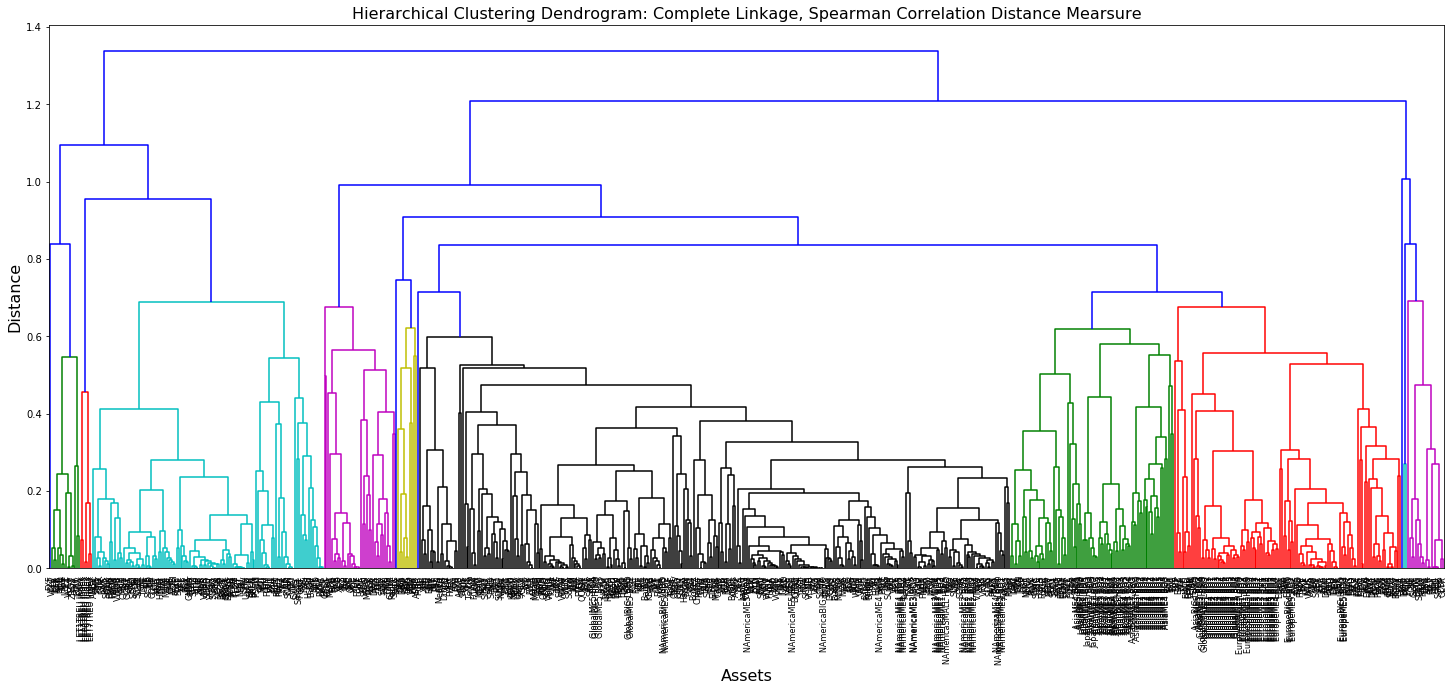

In [22]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, Spearman Correlation Distance Mearsure', fontsize = 16)
plt.xlabel('Assets', fontsize = 16)
plt.ylabel('Distance', fontsize = 16)
plt.show()

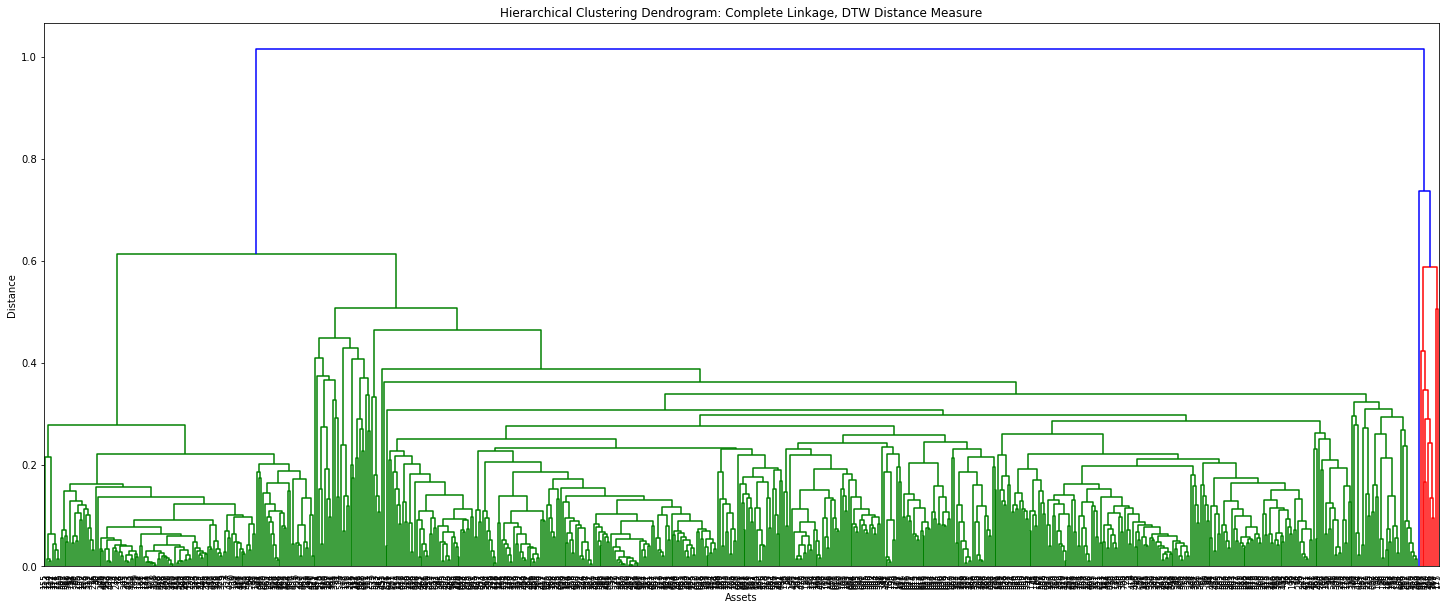

In [23]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, DTW Distance Measure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

### 2.2.3 Ward linkage <a class="anchor" id="three.two.three"></a>

Here we use the ward linkage method to cluster the indexes for the two different distance measures applied.

In [24]:
#spearman corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
#ward_eu = ward(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
ward_corr = ward(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
ward_dtw = ward(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

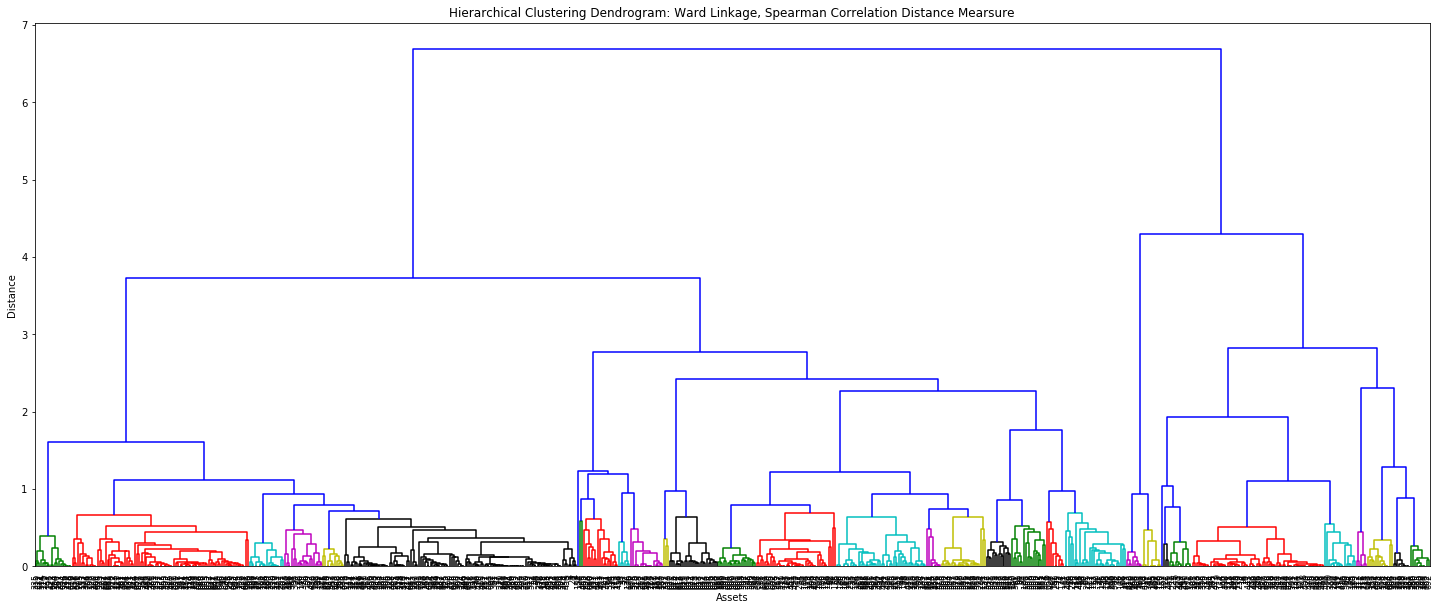

In [25]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
 #   labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, Spearman Correlation Distance Mearsure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

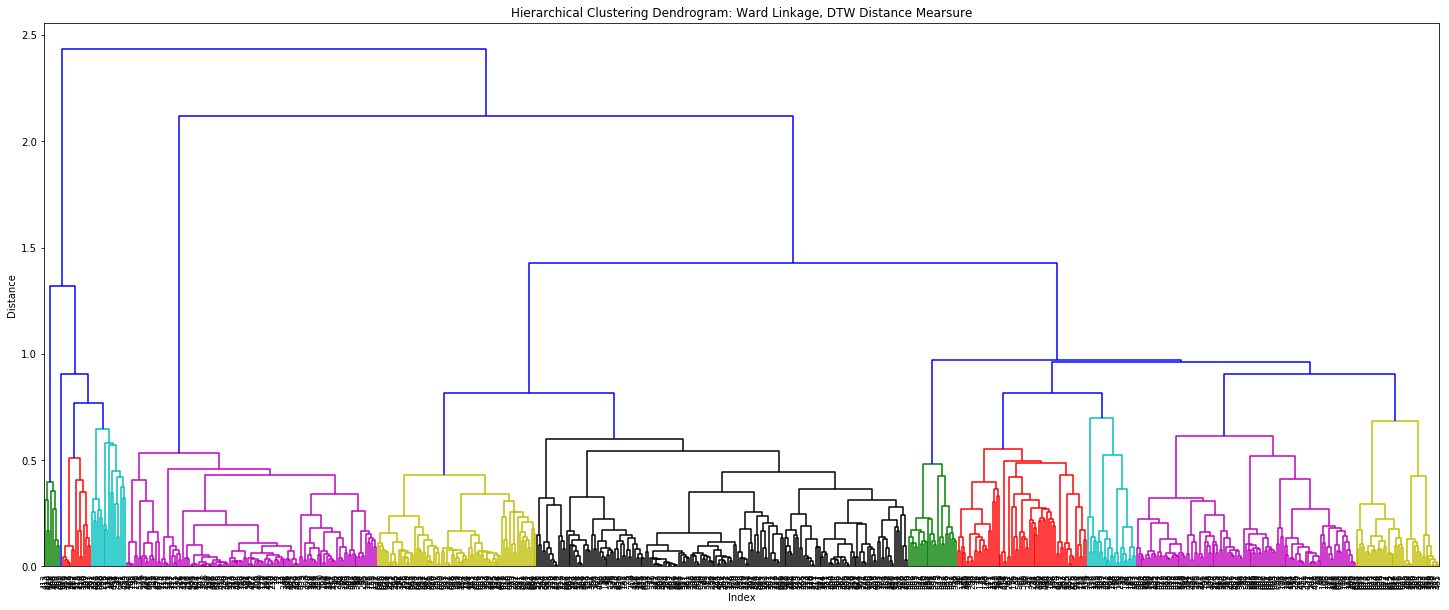

In [26]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, DTW Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

## 2.3 Finding the Optimal Number of Clusters with the Silhouette Coefficient

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

We begin by looking at the silhouette score for the ward and complete linkages and the correlation and dtw distance measures. The Silhouette Score is calculated by lookin at the intra-cluster distance as well as the mean distance to the nearest cluster for each observation/asset. It returns a score between -1 and 1, -1 suggesting incorrect clustering and 1 really good clustering where the clusteres are very dence.

**Complete Linkage, Correlation Distance Measure.**

In [27]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(complete_corr, i, criterion="maxclust"), metric="precomputed" ))
    

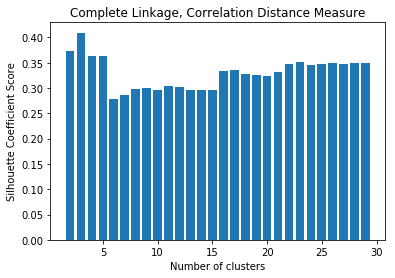

In [28]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.title("Complete Linkage, Correlation Distance Measure")
plt.show()

**Ward Linkage, Correlation Distance Measure.**

In [29]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(ward_corr, i, criterion="maxclust"), metric="precomputed" ))

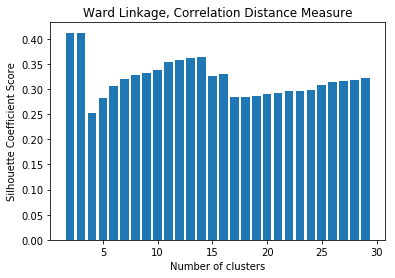

In [30]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.title("Ward Linkage, Correlation Distance Measure")
plt.show()

**Complete linkage, DTW**

In [31]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(complete_dtw, i, criterion="maxclust"), metric="precomputed" ))
    

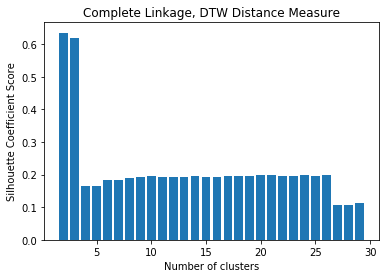

In [32]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.title("Complete Linkage, DTW Distance Measure")
plt.show()

**Ward linkage, DTW**

In [33]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(ward_dtw, i, criterion="maxclust"), metric="precomputed" ))

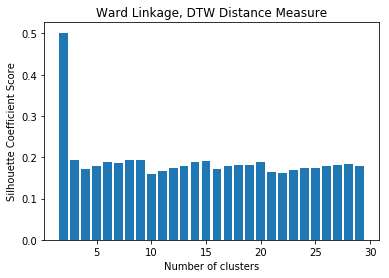

In [34]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
#plt.xticks("")
plt.title("Ward Linkage, DTW Distance Measure")
plt.show()

**And now we want to save the clustering into a dataframe.**

In [35]:
#Create the dataframe
cluster_df = pd.DataFrame(index=distance_corr.index)

#Save the Ward_Eu clustering into the dataframe with 8 clusters
#cluster_df["Ward_Eu"] = fcluster(ward_eu, 3, criterion="maxclust")

#Save the Ward_Corr clustering into the dataframe with 8 clusters
cluster_df["Ward_Corr"] = fcluster(ward_corr, 3, criterion="maxclust")

#Save the Ward_DTW clustering into the dataframe with 8 clusters
cluster_df["Ward_DTW"] = fcluster(ward_dtw, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
#cluster_df["Complete_Eu"] = fcluster(complete_eu, 3, criterion="maxclust")

#Save the Complete_Corr clustering into the dataframe with 8 clusters
cluster_df["Complete_Corr"] = fcluster(complete_corr, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
cluster_df["Complete_DTW"] = fcluster(complete_dtw, 3, criterion="maxclust")

#Save the Return into the dataframe
#cluster_df["AverageRet"] = ret["AvgReturnYearly"]

#Save the Standard Deviation into the dataframe
#cluster_df["StandardDev"] = ret["YearlyStd"]

#Add the sharpe ratio to the dataframe
#cluster_df["Sharpe_Ratio"] = (ret["AvgReturnYearly"])/ret["YearlyStd"]

#Add the class (ETF or index) to the dataframe
#cluster_df["Class"] = classes

In [36]:
cluster_df.head()

,Ward_Corr,Ward_DTW,Complete_Corr,Complete_DTW
ANGL,3,2,1,1
AOA,1,3,2,1
AOK,1,2,1,1
AOM,1,2,1,1
AOR,1,3,2,1


# Cluster the second half of the dataset!


# 1. Loading in the Data and Basic Analysis

## 1.1 Data Preprocessing

Load in the ETF return data and index return data

In [37]:
ETF_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetNEWERdates.csv", index_col=0)

In [38]:
Index_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-index_data.csv",index_col=0)

In [39]:
ETF_data.head()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,XLY,XME,XMLV,XOP,XPH,XRT,XSD,XSLV,XTN,ZROZ
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.000092,-0.073457,-0.011585,-0.040176,0.007890,-0.014151,-0.004626,-0.012456,-0.016667,0.039955
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.016010,-0.056361,-0.004654,-0.045565,-0.020060,-0.020549,-0.036311,-0.005790,-0.027024,0.062946
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,0.003689,-0.030445,0.003751,-0.052264,0.008009,0.003998,-0.021828,0.013795,-0.014620,-0.000249
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.059568,-0.062250,-0.025591,-0.120739,-0.060048,-0.035232,-0.110973,-0.004802,-0.045082,0.035257
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.052510,0.041779,0.058124,0.036793,0.049401,0.033205,0.065079,0.034663,0.080125,-0.012111


In [40]:
Index_data.head(5)

,AsiaSMALL LoBO,AsiaME1 BO2,AsiaME1 BO3,AsiaME1 BO4,AsiaSMALL HiBO,AsiaME2 BO1,AsiaME2 BO2,AsiaME2 BO3,AsiaME2 BO4,AsiaME2 BO5,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
,,,,,,,,,,,,,,,,,,,,,
2000-11-15,-0.016350,0.004071,-0.019912,-0.014557,-0.017356,-0.012267,-0.024224,-0.016517,-0.015568,-0.012546,...,0.015049,0.013815,-0.042876,-0.034672,0.003267,0.001545,0.002784,0.003694,0.004148,0.005609
2000-11-22,0.006672,0.016849,0.016397,0.006049,0.003423,-0.006967,0.007591,0.006678,0.008349,0.002632,...,-0.037312,0.011465,-0.089051,-0.058248,0.003461,0.000998,0.001474,0.002552,0.004613,0.010358
2000-11-29,-0.029141,-0.024495,-0.017090,-0.031009,-0.024471,-0.051371,-0.020776,-0.005210,-0.022288,-0.026797,...,0.019825,-0.001677,-0.004267,0.006627,0.006869,0.003444,0.006166,0.007838,0.009037,0.010558
2000-12-06,-0.012367,-0.015601,-0.023586,-0.005379,-0.010344,-0.021430,-0.022750,-0.013214,0.021566,-0.011720,...,0.008048,-0.050099,0.001868,0.027445,0.002910,0.003071,0.004431,0.004902,0.004051,-0.002972
2000-12-13,0.000938,0.015727,0.020245,-0.002130,0.013378,0.011243,0.026620,0.014591,0.020863,0.014379,...,0.010919,0.033585,0.067698,0.006119,0.006227,0.002431,0.004328,0.006113,0.007530,0.014818


The indexes are objects and we need to change them to daytime

In [41]:
ETF_data.index = pd.to_datetime(ETF_data.index, yearfirst=True)

In [42]:
Index_data.index = pd.to_datetime(Index_data.index, yearfirst=True)

Now we can join the two dataframes on the index of the ETF dataframe.

In [43]:
joined = ETF_data.join(Index_data)

In [44]:
joined

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
2014-09-24,0.002812,-0.004842,0.005850,0.004202,-3.813270e-08,0.026287,0.013656,0.038108,0.006994,0.009539,...,0.007661,-0.008260,0.001517,0.005168,0.003626,-0.000056,0.000381,0.001109,0.003562,0.010203
2014-10-01,0.007270,-0.012619,0.004794,0.000748,-5.233600e-03,0.003514,0.023538,-0.028072,0.012553,0.022177,...,-0.020985,-0.021133,-0.016002,-0.012500,0.002894,-0.000056,0.000489,0.001491,0.003176,0.007490
2014-10-08,-0.000968,-0.001163,-0.003957,-0.003614,2.232379e-04,0.018744,-0.001835,0.003348,-0.009030,-0.000965,...,-0.000254,-0.004398,0.001961,0.005572,0.001167,-0.000336,0.000077,0.000938,0.002085,0.002663
2014-10-15,-0.028931,-0.044180,-0.022106,-0.026584,-3.477765e-02,-0.025064,0.003597,-0.078044,-0.008274,0.001016,...,-0.052006,-0.056164,-0.062589,-0.042066,-0.004158,-0.001175,-0.003055,-0.004442,-0.004556,-0.006895
2014-10-22,0.038070,0.039399,0.024269,0.028430,3.357497e-02,0.001784,0.005373,0.102960,0.014983,0.009690,...,0.063258,0.076020,0.035589,0.041156,-0.001280,-0.000168,-0.000117,-0.000121,-0.000945,-0.003821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,0.039342,-0.009836,0.003925,0.000295,-4.023450e-03,-0.036260,0.003270,0.026008,-0.007661,0.008965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08,0.047920,0.082964,0.040419,0.048054,6.284270e-02,0.061844,0.038214,0.095140,0.009623,0.014833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-15,0.051029,0.001320,0.005950,0.003265,2.997190e-03,-0.014426,0.024061,0.019808,-0.004752,0.015044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-22,-0.014878,0.014925,0.007998,0.012831,1.413391e-02,0.028546,0.015500,0.075722,0.007998,0.005898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
joined.index.dtype

dtype('<M8[ns]')

We only have the index data until the 2019-04-10 so we need to cut the end of the dataframe.

In [46]:
enddate = "04-11-2019" 

joined = joined[joined.index < enddate]

joined.tail()

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
2019-03-13,-0.000617,0.006665,0.003033,0.005002,0.006041,-0.032574,0.004032,0.031632,-0.001123,0.004032,...,0.018714,-0.002824,-0.001776,0.022301,-0.000839,-0.000167,-0.000460,-0.000675,-0.000740,-0.001616
2019-03-20,-0.001074,-0.000407,0.000162,0.000214,-0.001426,0.022585,-0.003883,-0.012407,-0.007473,-0.001096,...,-0.016113,-0.024386,-0.011934,-0.006389,0.008319,0.000222,0.001439,0.003326,0.007220,0.020606
2019-03-27,0.014981,0.008535,0.016752,0.014981,0.012026,-0.020018,0.031247,-0.020677,0.015535,0.024239,...,-0.000718,0.004927,-0.008209,0.003505,0.000740,0.000222,0.000839,0.001018,0.000942,0.000760
2019-04-03,0.007966,0.019795,0.004954,0.008053,0.013855,0.083112,-0.010384,0.045146,0.001184,-0.005459,...,0.018245,0.040046,0.052647,0.019539,-0.002148,-0.000666,-0.001088,-0.001379,-0.002429,-0.003900
2019-04-10,0.004224,0.000103,0.000641,0.000528,0.000815,0.008223,0.002888,0.002351,-0.002967,0.001022,...,0.004748,0.001318,0.003198,-0.011486,-0.000404,0.000333,0.000638,0.000984,0.000106,-0.002371


In [47]:
percentage = int(len(joined) * 0.5)
joined = joined[percentage:]

In [48]:
joined

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
2017-01-04,-0.002963,0.006415,0.000695,0.003470,0.003776,0.035475,-0.004879,0.026321,-0.007047,-0.000650,...,-0.002125,0.013974,0.014420,-0.004100,-0.009486,-0.001383,-0.003125,-0.004859,-0.009413,-0.021576
2017-01-11,-0.002365,-0.003886,-0.006738,-0.006074,-0.004017,-0.024252,-0.002065,0.002037,-0.008861,-0.004210,...,-0.008624,-0.020356,-0.007904,-0.016612,0.001231,-0.000055,0.000877,0.002053,0.003594,0.000503
2017-01-18,-0.004007,-0.007174,-0.006511,-0.008599,-0.007837,0.009357,-0.007863,-0.008034,-0.004907,-0.007312,...,-0.010086,-0.018070,-0.018338,-0.013751,-0.006706,-0.000609,-0.001430,-0.003479,-0.006825,-0.016062
2017-01-25,-0.005114,0.001711,-0.007849,-0.006693,-0.002187,0.006131,-0.018110,-0.021757,-0.010658,-0.015151,...,0.001887,0.009100,0.010792,-0.008599,-0.005619,-0.000887,-0.003143,-0.005792,-0.007936,-0.009126
2017-02-01,-0.001252,-0.006696,-0.001056,-0.001689,-0.005830,0.000443,0.003202,0.032684,-0.001912,0.001504,...,-0.007570,-0.012706,-0.020716,-0.012122,-0.001080,0.000666,0.001242,0.000798,-0.001459,-0.004472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-13,-0.000617,0.006665,0.003033,0.005002,0.006041,-0.032574,0.004032,0.031632,-0.001123,0.004032,...,0.018714,-0.002824,-0.001776,0.022301,-0.000839,-0.000167,-0.000460,-0.000675,-0.000740,-0.001616
2019-03-20,-0.001074,-0.000407,0.000162,0.000214,-0.001426,0.022585,-0.003883,-0.012407,-0.007473,-0.001096,...,-0.016113,-0.024386,-0.011934,-0.006389,0.008319,0.000222,0.001439,0.003326,0.007220,0.020606
2019-03-27,0.014981,0.008535,0.016752,0.014981,0.012026,-0.020018,0.031247,-0.020677,0.015535,0.024239,...,-0.000718,0.004927,-0.008209,0.003505,0.000740,0.000222,0.000839,0.001018,0.000942,0.000760
2019-04-03,0.007966,0.019795,0.004954,0.008053,0.013855,0.083112,-0.010384,0.045146,0.001184,-0.005459,...,0.018245,0.040046,0.052647,0.019539,-0.002148,-0.000666,-0.001088,-0.001379,-0.002429,-0.003900


# 2. Clustering <a class="anchor" id="three"></a>

When clustering the indexes the analysis can be divided into three different parts:
- Determining a measure to quantify the similarities between observations
- Determining which clustering method to use
- Finding the optimal number of clusters

In this chapter the main refrence is a thesis written by Pjotr Roelofsen in 2018, on [Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).


## 2.1 Distance Measures <a class="anchor" id="three.one"></a>

Many different distance measures can be considered when clustering time series data. In this analysis three different methods will be considered:

- The Euclidean Distance (A Lock-Step Measure)
- The Person Correlation Distance (A Lock-Step Measure)
- The Dynamic Time Wraping (Elastic measure)

These methods were chosen since they seem to be the most popular ones and are straight forward in application. When comparing these three distance measures the calculation time for the DTW measure is much higher than for the Correlation measure, but it is more robust and often outperforms the other.


### 2.1.2 Spearman!!! Correlation Distance<a class="anchor" id="three.one.one"></a>

In the Pearson Correlation Distance the linear association between two time series is calculated. For further information on how the correlation is defined, see [chapter 2.1.2](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). The correlation lies in the range [-1,1] and the distance is defined as
$d_{cor}(x,y)=1-\rho(x,y)$. So if the correlation is high, the distance is small and if it is low the distance is high. 

This distance measure is considered a lock-step method since it compares the same timepoint between both series.

In [49]:
corr = joined.corr(method="spearman") #calculate the correlation
distance_corr = 1-corr #distance based on correlation

In [50]:
distance_corr

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
ANGL,0.000000,0.283962,0.157912,0.163937,0.206253,0.828358,0.386028,0.621179,0.305063,0.338185,...,0.434553,0.572596,0.487260,0.412249,0.994566,1.081891,1.025566,1.002614,0.993740,0.991860
AOA,0.283962,0.000000,0.226029,0.135251,0.037751,0.636391,0.719762,0.353938,0.602706,0.678315,...,0.233435,0.303461,0.192352,0.254750,1.107079,1.197570,1.153603,1.124028,1.097821,1.094118
AOK,0.157912,0.226029,0.000000,0.029782,0.108581,0.828336,0.249786,0.575737,0.204900,0.213217,...,0.376357,0.528422,0.434831,0.318445,0.982410,1.052914,1.015924,1.010291,0.982859,0.972917
AOM,0.163937,0.135251,0.029782,0.000000,0.048291,0.767248,0.351901,0.487103,0.285515,0.315738,...,0.308062,0.446845,0.346582,0.275588,1.015511,1.104340,1.062434,1.043598,1.010583,1.007200
AOR,0.206253,0.037751,0.108581,0.048291,0.000000,0.704259,0.537893,0.389952,0.446781,0.497992,...,0.249594,0.346710,0.248497,0.256780,1.087502,1.178760,1.137687,1.114143,1.078842,1.070602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LET1TREU Index,1.081891,1.197570,1.052914,1.104340,1.178760,1.024714,0.898939,1.201997,0.948221,0.887138,...,1.145300,1.221672,1.108183,1.114262,0.247951,0.000000,0.049530,0.116461,0.264129,0.379288
LET3TREU Index,1.025566,1.153603,1.015924,1.062434,1.137687,1.041276,0.858467,1.203561,0.938178,0.851787,...,1.113951,1.205341,1.120944,1.105726,0.128628,0.049530,0.000000,0.025951,0.128351,0.248141
LET5TREU Index,1.002614,1.124028,1.010291,1.043598,1.114143,1.020951,0.857300,1.194937,0.955362,0.852464,...,1.092209,1.183222,1.116828,1.094431,0.059151,0.116461,0.025951,0.000000,0.051275,0.155975
LET7TREU Index,0.993740,1.097821,0.982859,1.010583,1.078842,1.032253,0.821222,1.190130,0.948148,0.828899,...,1.070254,1.160426,1.132417,1.087858,0.020033,0.264129,0.128351,0.051275,0.000000,0.067177


In [51]:
corr.iloc[539:,:539].mean().mean()

0.4258747284720036

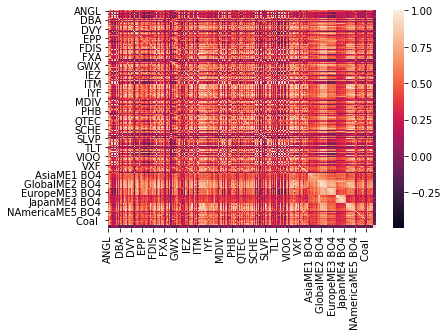

In [52]:
import seaborn as sns
%matplotlib inline

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=30 ,#corr.columns,
        yticklabels=30 #corr.columns,
           )

### 2.1.3 Dynamic Time Wrapping<a class="anchor" id="three.one.two"></a> 

The difference between elastic distance measures and lock-step distance measures is that the elastic measures allow for one-to-many or one-to-none point matching. This gives more flexibility and robustness for example in handling outliers.

DTW is a relatively new method, introduced in 2004, which seeks to overcome some of the disadvantages of the Euclidean distance. In general, DTW calculates an optimal match between two given sequences, ot the path that has the minimal cost (while fulfilling all the restrictions). For further details on oth the algorithm works see [Wikipedia article](https://en.wikipedia.org/wiki/Dynamic_time_warping) or [Pjotr Roelofsens thesis on Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).

Here the dtw function in tslearn is used to calculate the dtw value, for docmumentation see [here](https://tslearn.readthedocs.io/en/latest/gen_modules/metrics/tslearn.metrics.dtw.html).

Lets try the function and see how it works.

So it delivers a single similarity measure when two time-series are compared. Now we calculate the dtw matrix comparing all pairs of the time series.

In [53]:
joined_np=np.transpose(joined.values) #change the dataframe into a numpy array

distance_dtw =cdist_dtw(joined_np) #calculate the dtw matrix

distance_dtw=pd.DataFrame(data = distance_dtw, index=joined.columns, columns=joined.columns) #save it into a dataframe

In [54]:
distance_dtw

,ANGL,AOA,AOK,AOM,AOR,ASHR,BAB,BBH,BIL,BIV,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
ANGL,0.000000,0.087182,0.048744,0.051325,0.065337,0.201223,0.080101,0.231052,0.057472,0.066806,...,0.139316,0.186802,0.181124,0.139413,0.079062,0.101597,0.090911,0.084128,0.079991,0.078098
AOA,0.087182,0.000000,0.081965,0.069006,0.037608,0.194074,0.092065,0.196533,0.089878,0.090331,...,0.110868,0.154191,0.152583,0.120931,0.110729,0.131146,0.121216,0.113898,0.110134,0.102419
AOK,0.048744,0.081965,0.000000,0.023298,0.052424,0.209562,0.068045,0.233331,0.050928,0.055098,...,0.141419,0.193162,0.187655,0.143259,0.069317,0.088815,0.078536,0.072187,0.067619,0.073977
AOM,0.051325,0.069006,0.023298,0.000000,0.037606,0.208331,0.073156,0.228698,0.059275,0.065660,...,0.139238,0.187086,0.183851,0.139852,0.073981,0.093444,0.083946,0.076940,0.071576,0.076106
AOR,0.065337,0.037608,0.052424,0.037606,0.000000,0.198978,0.082929,0.212978,0.071265,0.076133,...,0.121884,0.170537,0.169317,0.127405,0.088017,0.108232,0.098574,0.091992,0.086483,0.084094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LET1TREU Index,0.101597,0.131146,0.088815,0.093444,0.108232,0.271217,0.117801,0.289121,0.094170,0.104174,...,0.196249,0.250092,0.243695,0.198794,0.039465,0.000000,0.015490,0.028864,0.044342,0.086683
LET3TREU Index,0.090911,0.121216,0.078536,0.083946,0.098574,0.260771,0.108285,0.278482,0.084708,0.093876,...,0.185676,0.236436,0.232462,0.186675,0.027683,0.015490,0.000000,0.014568,0.031994,0.076164
LET5TREU Index,0.084128,0.113898,0.072187,0.076940,0.091992,0.249543,0.100823,0.269148,0.078188,0.087695,...,0.175960,0.226276,0.222491,0.176809,0.017347,0.028864,0.014568,0.000000,0.019863,0.064251
LET7TREU Index,0.079991,0.110134,0.067619,0.071576,0.086483,0.238003,0.095058,0.261117,0.073854,0.082995,...,0.168576,0.216878,0.214069,0.169392,0.010287,0.044342,0.031994,0.019863,0.000000,0.048039


And as the with the distance based on correlation an index has a distance of 0 with itself.

## 2.2 Hierarchial clustering <a class="anchor" id="three.two"></a>

Here agglomerative clustering will be used, which is a bottom-up approch. This means that in the beginning all observations form their individual cluster and in each step the closest clusters combine into a new cluster. This is repeated until all observations are in one big cluster. Three methods are most commonly used to define the distance between clusters, Single linkage, Complete linkage and Ward linkage. In single linkage the distance is defined as the smallest distance between any observations in the two clusters, while complete linkage is the biggest distance between any two observations in the two clusters. Ward linkage aims to minimize the variance within each cluster. For further information on hierarchial clustering, see [here](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). 

Scipy.cluster.hierarchy will be used in this section. Documentation on the package used can be found [here](https://docs.scipy.org/doc/scipy-0.9.0/reference/cluster.hierarchy.html). Here it is possible to use the distance matrixes as input into the clustering algorithm.

Tutorial on how to use the packages can be found [here](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/).
 
An important question here is what is the optimal number of clusters? 


This function helps us plot nice dendograms.

In [55]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### 2.2.1 Single linkage <a class="anchor" id="three.two.one"></a>

Here we use the single linkage method to cluster the indexes for the two different distance measures applied.

In [56]:
#Euclidean distance matrix
#con_distance_eu = squareform(distance_eu) #condence the distance matrix to be able to fit the hierarcal clustering
#single_eu = single(con_distance_eu) #apply hierarchial clustering using the single distance measure

#corr perman distance matrix
con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
single_corr = single(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
single_dtw = single(con_distance_dtw) #apply hierarchial clustering using the single distance measure

### 2.2.2 Complete linkage <a class="anchor" id="three.two.two"></a>

Here we use the complete linkage method to cluster the indexes for the two different distance measures applied.

In [57]:
#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
#complete_eu = complete(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
complete_dtw = complete(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

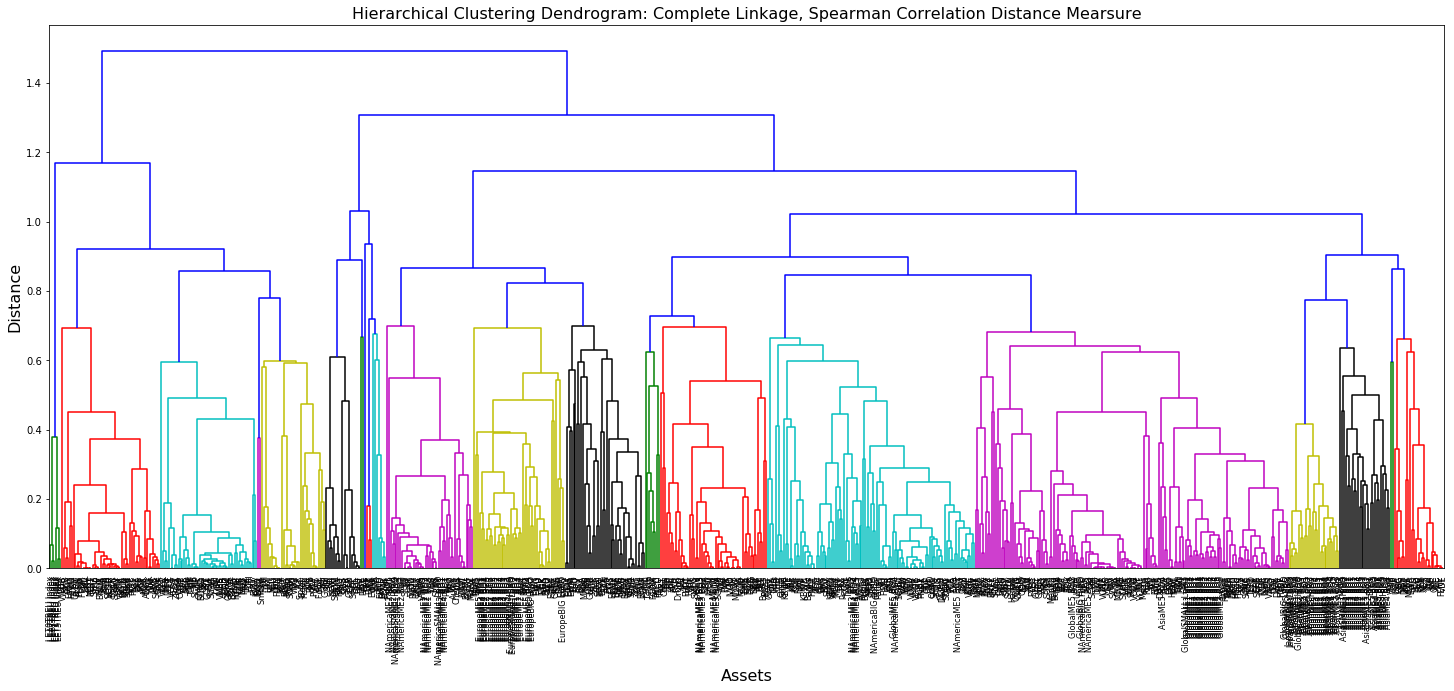

In [58]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, Spearman Correlation Distance Mearsure', fontsize = 16)
plt.xlabel('Assets', fontsize = 16)
plt.ylabel('Distance', fontsize = 16)
plt.show()

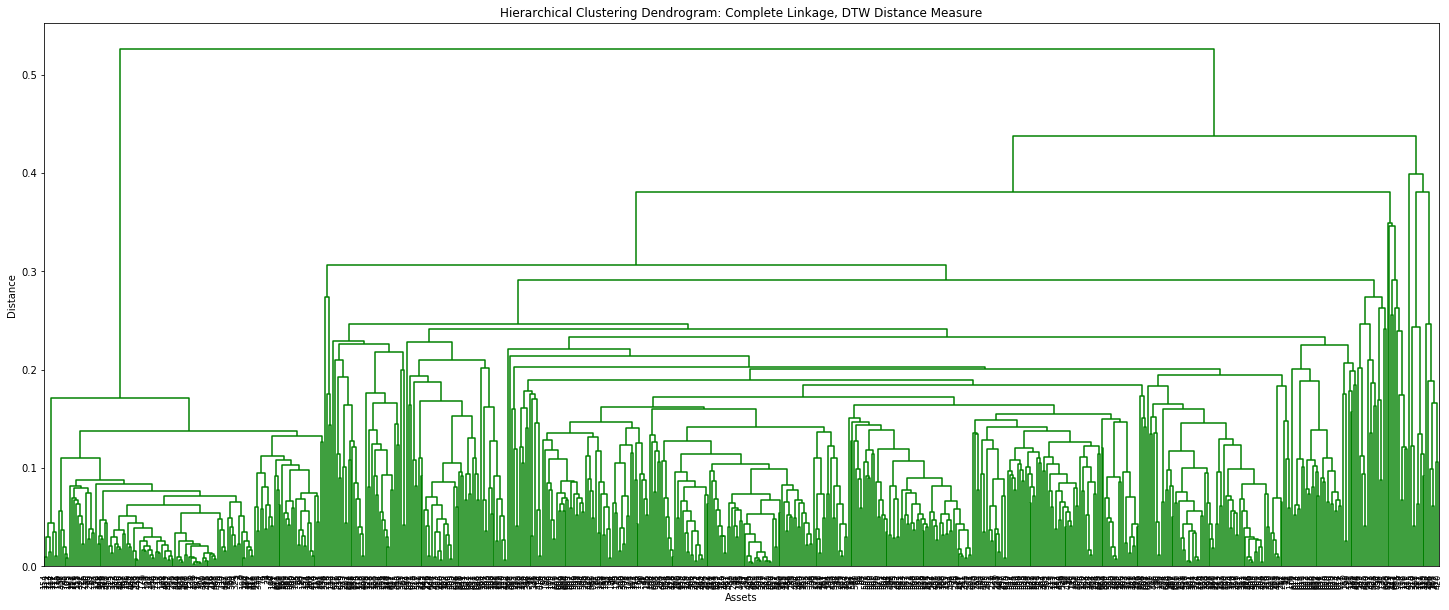

In [59]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, DTW Distance Measure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

### 2.2.3 Ward linkage <a class="anchor" id="three.two.three"></a>

Here we use the ward linkage method to cluster the indexes for the two different distance measures applied.

In [60]:
#spearman corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
#ward_eu = ward(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
ward_corr = ward(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
ward_dtw = ward(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

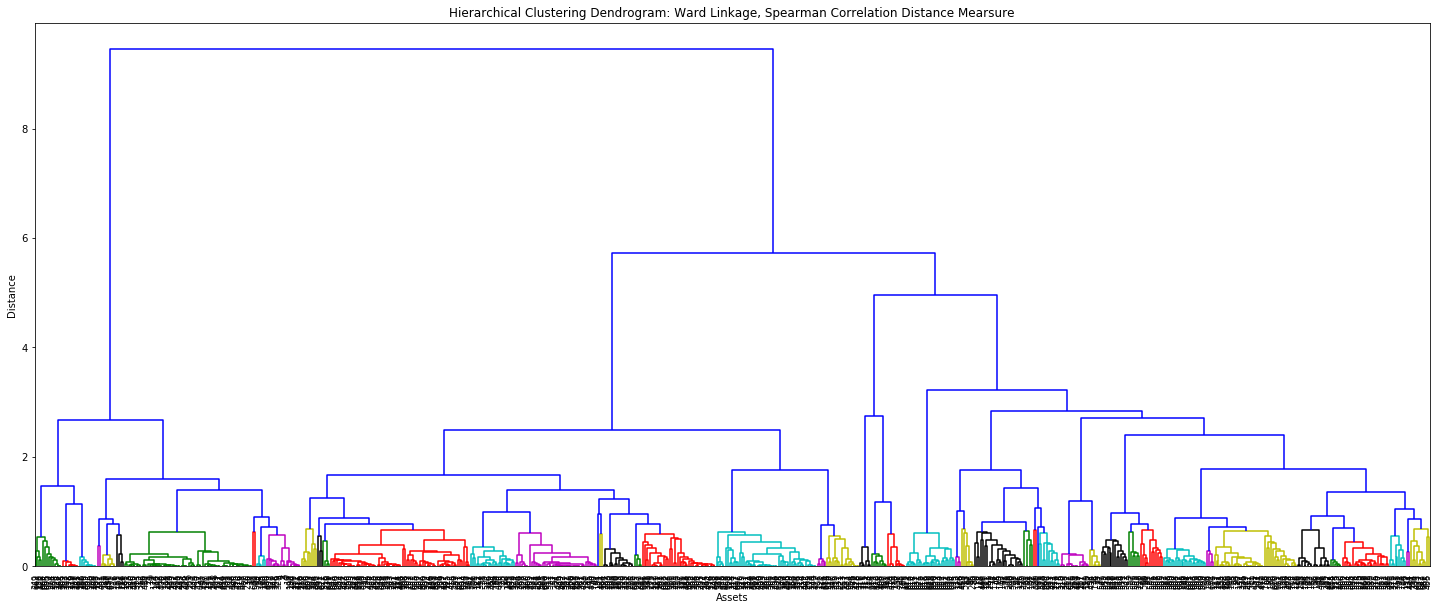

In [61]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
 #   labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, Spearman Correlation Distance Mearsure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

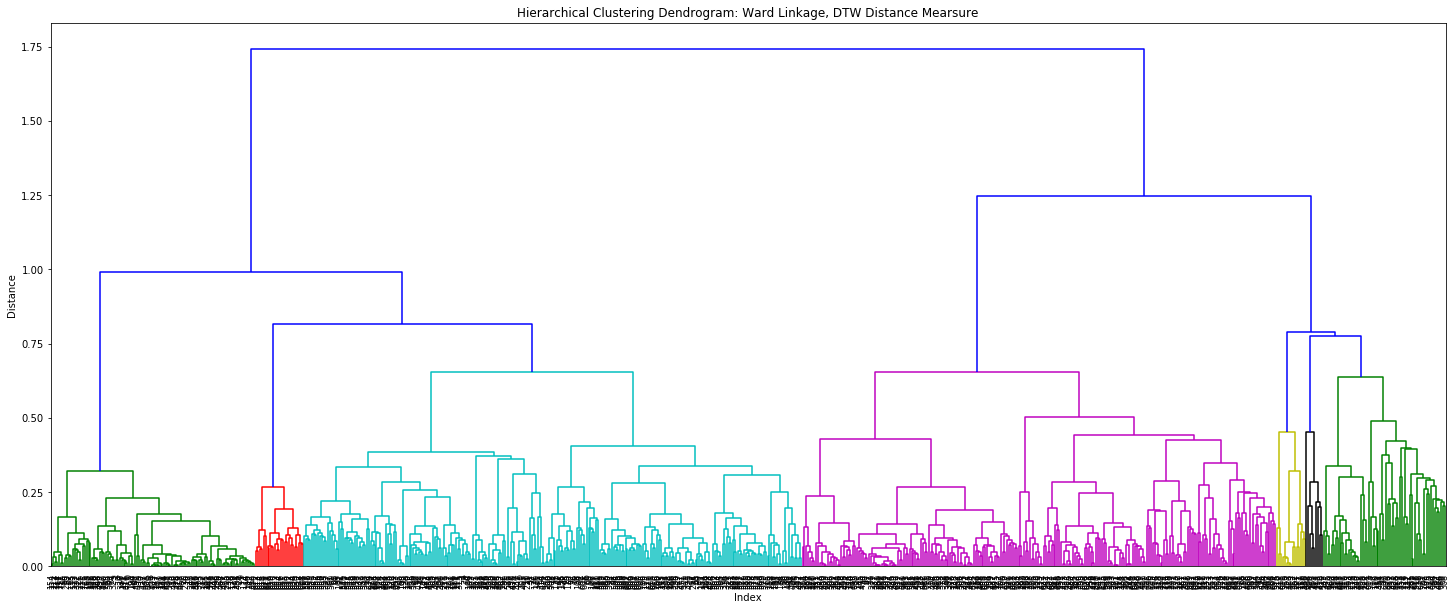

In [62]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, DTW Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

## 2.3 Finding the Optimal Number of Clusters with the Silhouette Coefficient

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

We begin by looking at the silhouette score for the ward and complete linkages and the correlation and dtw distance measures. The Silhouette Score is calculated by lookin at the intra-cluster distance as well as the mean distance to the nearest cluster for each observation/asset. It returns a score between -1 and 1, -1 suggesting incorrect clustering and 1 really good clustering where the clusteres are very dence.

**Complete Linkage, Correlation Distance Measure.**

In [63]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(complete_corr, i, criterion="maxclust"), metric="precomputed" ))
    

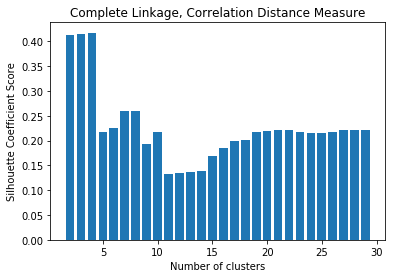

In [64]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.title("Complete Linkage, Correlation Distance Measure")
plt.show()

**Ward Linkage, Correlation Distance Measure.**

In [65]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(ward_corr, i, criterion="maxclust"), metric="precomputed" ))

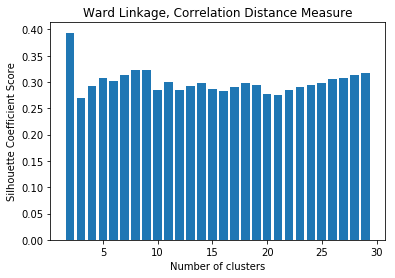

In [66]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.title("Ward Linkage, Correlation Distance Measure")
plt.show()

**Complete linkage, DTW**

In [67]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(complete_dtw, i, criterion="maxclust"), metric="precomputed" ))
    

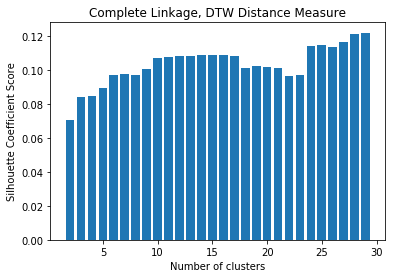

In [68]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.title("Complete Linkage, DTW Distance Measure")
plt.show()

**Ward linkage, DTW**

In [69]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(ward_dtw, i, criterion="maxclust"), metric="precomputed" ))

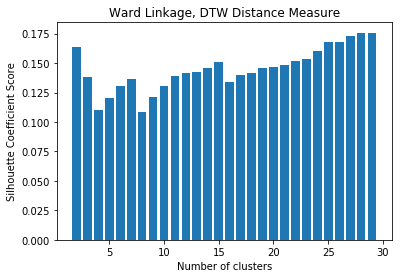

In [70]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
#plt.xticks("")
plt.title("Ward Linkage, DTW Distance Measure")
plt.show()

**And now we want to save the clustering into a dataframe.**

In [71]:
#Create the dataframe
cluster_df_2 = pd.DataFrame(index=distance_corr.index)

#Save the Ward_Eu clustering into the dataframe with 8 clusters
#cluster_df["Ward_Eu"] = fcluster(ward_eu, 3, criterion="maxclust")

#Save the Ward_Corr clustering into the dataframe with 8 clusters
cluster_df_2["Ward_Corr"] = fcluster(ward_corr, 3, criterion="maxclust")

#Save the Ward_DTW clustering into the dataframe with 8 clusters
cluster_df_2["Ward_DTW"] = fcluster(ward_dtw, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
#cluster_df["Complete_Eu"] = fcluster(complete_eu, 3, criterion="maxclust")

#Save the Complete_Corr clustering into the dataframe with 8 clusters
cluster_df_2["Complete_Corr"] = fcluster(complete_corr, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
cluster_df_2["Complete_DTW"] = fcluster(complete_dtw, 3, criterion="maxclust")

#Save the Return into the dataframe
#cluster_df_2["AverageRet"] = ret["AvgReturnYearly"]

#Save the Standard Deviation into the dataframe
#cluster_df_2["StandardDev"] = ret["YearlyStd"]

#Add the sharpe ratio to the dataframe
#cluster_df_2["Sharpe_Ratio"] = (ret["AvgReturnYearly"])/ret["YearlyStd"]

#Add the class (ETF or index) to the dataframe
#cluster_df_2["Class"] = classes

In [72]:
cluster_df_2

,Ward_Corr,Ward_DTW,Complete_Corr,Complete_DTW
ANGL,1,1,1,1
AOA,2,1,3,1
AOK,1,1,1,1
AOM,1,1,1,1
AOR,1,1,3,1
...,...,...,...,...
LET1TREU Index,3,1,1,1
LET3TREU Index,3,1,1,1
LET5TREU Index,3,1,1,1
LET7TREU Index,3,1,1,1


In [73]:
cluster_df

,Ward_Corr,Ward_DTW,Complete_Corr,Complete_DTW
ANGL,3,2,1,1
AOA,1,3,2,1
AOK,1,2,1,1
AOM,1,2,1,1
AOR,1,3,2,1
...,...,...,...,...
LET1TREU Index,3,2,1,1
LET3TREU Index,3,2,1,1
LET5TREU Index,3,2,1,1
LET7TREU Index,3,2,1,1


**Calculate the variation of information.**

https://www.sciencedirect.com/science/article/pii/S0047259X06002016

In [74]:
from math import log

def variation_of_information(X, Y):
  n = float(sum([len(x) for x in X]))
  sigma = 0.0
  for x in X:
    p = len(x) / n
    for y in Y:
      q = len(y) / n
      r = len(set(x) & set(y)) / n
      if r > 0.0:
        sigma += r * (log(r / p, 2) + log(r / q, 2))
  return abs(sigma)


In [75]:
cluster1=cluster_df[(cluster_df["Ward_DTW"]==1)].index.tolist()
cluster2=cluster_df[(cluster_df["Ward_DTW"]==2)].index.tolist()
cluster3=cluster_df[(cluster_df["Ward_DTW"]==3)].index.tolist()

cluster_1 = [cluster1, cluster2, cluster3]

In [76]:
cluster1_2=cluster_df_2[(cluster_df_2["Ward_DTW"]==1)].index.tolist()
cluster2_2=cluster_df_2[(cluster_df_2["Ward_DTW"]==2)].index.tolist()
cluster3_2=cluster_df_2[(cluster_df_2["Ward_DTW"]==3)].index.tolist()

cluster_2 = [cluster1_2, cluster2_2, cluster3_2]

In [77]:
variation_of_information(cluster_1,cluster_2)

1.6529455596443783

In [78]:
cluster1=cluster_df[(cluster_df["Ward_Corr"]==1)].index.tolist()
cluster2=cluster_df[(cluster_df["Ward_Corr"]==2)].index.tolist()
cluster3=cluster_df[(cluster_df["Ward_Corr"]==3)].index.tolist()

cluster_1 = [cluster1, cluster2,cluster3]

cluster1_2=cluster_df_2[(cluster_df_2["Ward_Corr"]==1)].index.tolist()
cluster2_2=cluster_df_2[(cluster_df_2["Ward_Corr"]==2)].index.tolist()
cluster3_2=cluster_df_2[(cluster_df_2["Ward_Corr"]==3)].index.tolist()

cluster_2 = [cluster1_2, cluster2_2, cluster3_2]

In [79]:
variation_of_information(cluster_1,cluster_2)

1.1923022288119525

In [80]:
cluster1=cluster_df[(cluster_df["Complete_Corr"]==1)].index.tolist()
cluster2=cluster_df[(cluster_df["Complete_Corr"]==2)].index.tolist()
cluster3=cluster_df[(cluster_df["Complete_Corr"]==3)].index.tolist()

cluster_1 = [cluster1, cluster2,cluster3]

cluster1_2=cluster_df_2[(cluster_df_2["Complete_Corr"]==1)].index.tolist()
cluster2_2=cluster_df_2[(cluster_df_2["Complete_Corr"]==2)].index.tolist()
cluster3_2=cluster_df_2[(cluster_df_2["Complete_Corr"]==3)].index.tolist()

cluster_2 = [cluster1_2, cluster2_2, cluster3_2]

In [81]:
variation_of_information(cluster_1,cluster_2)

0.2581890656500649

In [82]:
cluster1=cluster_df[(cluster_df["Complete_DTW"]==1)].index.tolist()
cluster2=cluster_df[(cluster_df["Complete_DTW"]==2)].index.tolist()
cluster3=cluster_df[(cluster_df["Complete_DTW"]==3)].index.tolist()

cluster_1 = [cluster1, cluster2,cluster3]

cluster1_2=cluster_df_2[(cluster_df_2["Complete_DTW"]==1)].index.tolist()
cluster2_2=cluster_df_2[(cluster_df_2["Complete_DTW"]==2)].index.tolist()
cluster3_2=cluster_df_2[(cluster_df_2["Complete_DTW"]==3)].index.tolist()

cluster_2 = [cluster1_2, cluster2_2, cluster3_2]

In [83]:
variation_of_information(cluster_1,cluster_2)

0.8768007495767516

In [84]:
cluster1=cluster_df[(cluster_df["Complete_DTW"]==1)].index.tolist()
cluster2=cluster_df[(cluster_df["Complete_DTW"]==2)].index.tolist()
cluster3=cluster_df[(cluster_df["Complete_DTW"]==3)].index.tolist()

cluster_1 = [cluster1, cluster2,cluster3]
cluster_2=cluster1

In [85]:
variation_of_information(cluster_1,cluster_2)

0.0

In [86]:
cluster1=cluster_df[(cluster_df["Complete_DTW"]==1)].index.tolist()
cluster2=cluster_df[(cluster_df["Complete_DTW"]==2)].index.tolist()
cluster3=cluster_df[(cluster_df["Complete_DTW"]==3)].index.tolist()

cluster_1 = [cluster1, cluster2,cluster3]

cluster1_2=cluster_df_2[(cluster_df["Complete_Corr"]==1)].index.tolist()
cluster2_2=cluster_df_2[(cluster_df["Complete_Corr"]==2)].index.tolist()
cluster3_2=cluster_df_2[(cluster_df["Complete_Corr"]==3)].index.tolist()

cluster_2 = [cluster1_2, cluster2_2, cluster3_2]

In [87]:
variation_of_information(cluster_1,cluster_2)

0.9227256473198597

**Calculate the rand index.**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [88]:
from sklearn.metrics import adjusted_rand_score

In [89]:
adjusted_rand_score(cluster_df["Complete_DTW"], cluster_df_2["Complete_DTW"])

0.07000615801097772

In [90]:
adjusted_rand_score(cluster_df["Complete_DTW"], cluster_df["Complete_DTW"])

1.0

In [91]:
adjusted_rand_score(cluster_df["Ward_DTW"].values.tolist(), cluster_df_2["Ward_DTW"].values.tolist())

0.09260149859541354

In [92]:
cluster_df["Ward_DTW"].values.tolist()

[2,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [93]:
adjusted_rand_score(cluster_df["Complete_Corr"].values.tolist(), cluster_df_2["Complete_Corr"].values.tolist())

0.9288320215269236

In [94]:
adjusted_rand_score([0,0,0,1,0,0,1],[1,1,1,1,1,1,2])

0.4166666666666667

In [95]:
from scipy.special import comb
from itertools import combinations
import numpy as np

def check_clusterings(labels_true, labels_pred):
    """Check that the two clusterings matching 1D integer arrays."""
    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)    
    # input checks
    if labels_true.ndim != 1:
        raise ValueError(
            "labels_true must be 1D: shape is %r" % (labels_true.shape,))
    if labels_pred.ndim != 1:
        raise ValueError(
            "labels_pred must be 1D: shape is %r" % (labels_pred.shape,))
    if labels_true.shape != labels_pred.shape:
        raise ValueError(
            "labels_true and labels_pred must have same size, got %d and %d"
            % (labels_true.shape[0], labels_pred.shape[0]))
    return labels_true, labels_pred

def rand_score (labels_true, labels_pred):
#"""given the true and predicted labels, it will return the Rand Index."""
    check_clusterings(labels_true, labels_pred)
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

In [96]:
rand_score(cluster_df["Complete_Corr"].values.tolist(), cluster_df_2["Complete_Corr"].values.tolist())

0.9666674458287557

In [97]:
rand_score(cluster_df["Complete_DTW"].values.tolist(), cluster_df_2["Complete_DTW"].values.tolist())

0.6606593269597875

In [98]:
rand_score(cluster_df["Ward_Corr"].values.tolist(), cluster_df_2["Ward_Corr"].values.tolist())

0.6507834474805794

In [99]:
rand_score(cluster_df["Ward_DTW"].values.tolist(), cluster_df_2["Ward_DTW"].values.tolist())

0.5294873892615881